In [44]:
from os import system
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
import pickle
import sys

In [45]:
path="final_data.csv"
df = pd.read_csv(path)
le = LabelEncoder()
sc = StandardScaler()

In [46]:
df['polymer'] = le.fit_transform(df["polymer"])
df[df.columns[2:]]=sc.fit_transform(df[df.columns[2:]])

In [47]:
X = df[df.columns[8:]].values
Y = df[df.columns[1]].values
name='All values of (nid)'

In [48]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=1, shuffle=True, stratify=Y)

In [49]:
# kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [50]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)
def get_model(model, x_train, x_test):
    return model.fit(x_train, y_train)

In [51]:
mlp = MLPClassifier(max_iter=500, random_state=0, verbose=True, activation='relu', batch_size=32, learning_rate_init= 0.0001,
n_iter_no_change=20,hidden_layer_sizes=(256, 128, 64, 32), solver='adam',shuffle=True, early_stopping=True)


In [52]:
# def start_gridsearch()
#     parameter_space = {
#         'hidden_layer_sizes': [(512, 256, 128), (512, 256, 128, 64), (256, 128, 64), (256, 128, 64, 32)],
#         'activation': ['relu', 'tanh', 'identity', 'logistic'],
#         'solver': ['sgd', 'adam', 'lbfgs'],
#         'alpha': [0.0001, 0.05, 0.00001],
#         'learning_rate': ['constant', 'adaptive'],
#     }

#     clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#     grid_search = clf.fit(x_train, y_train)

#     print('Best parameters found:\n', clf.best_params_)
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [53]:
kf = StratifiedKFold(5, shuffle=True, random_state=42) # Use for KFold classification
oos_y = []
scores_mlp = []



for train_index, test_index in kf.split(X,Y):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index],Y[train_index], Y[test_index]
    scores_mlp.append(get_score(mlp, x_train, x_test, y_train, y_test))  


Iteration 1, loss = 2.42410231
Validation score: 0.265625
Iteration 2, loss = 2.25993084
Validation score: 0.333333
Iteration 3, loss = 2.11542694
Validation score: 0.276042
Iteration 4, loss = 1.98483878
Validation score: 0.369792
Iteration 5, loss = 1.85389647
Validation score: 0.395833
Iteration 6, loss = 1.71971231
Validation score: 0.427083
Iteration 7, loss = 1.59225335
Validation score: 0.442708
Iteration 8, loss = 1.47737626
Validation score: 0.458333
Iteration 9, loss = 1.37978226
Validation score: 0.479167
Iteration 10, loss = 1.29976794
Validation score: 0.510417
Iteration 11, loss = 1.23721126
Validation score: 0.500000
Iteration 12, loss = 1.18747150
Validation score: 0.515625
Iteration 13, loss = 1.14561691
Validation score: 0.531250
Iteration 14, loss = 1.10954565
Validation score: 0.567708
Iteration 15, loss = 1.07692771
Validation score: 0.572917
Iteration 16, loss = 1.04701988
Validation score: 0.593750
Iteration 17, loss = 1.02048594
Validation score: 0.588542
Iterat

Iteration 140, loss = 0.29370671
Validation score: 0.854167
Iteration 141, loss = 0.29466061
Validation score: 0.864583
Iteration 142, loss = 0.29119621
Validation score: 0.864583
Iteration 143, loss = 0.29116647
Validation score: 0.843750
Iteration 144, loss = 0.29012170
Validation score: 0.869792
Iteration 145, loss = 0.28965892
Validation score: 0.843750
Iteration 146, loss = 0.29149865
Validation score: 0.859375
Iteration 147, loss = 0.28809275
Validation score: 0.848958
Iteration 148, loss = 0.29406337
Validation score: 0.859375
Iteration 149, loss = 0.28944199
Validation score: 0.875000
Iteration 150, loss = 0.28854886
Validation score: 0.848958
Iteration 151, loss = 0.28648600
Validation score: 0.869792
Iteration 152, loss = 0.28729282
Validation score: 0.859375
Iteration 153, loss = 0.28629931
Validation score: 0.843750
Iteration 154, loss = 0.28398455
Validation score: 0.869792
Iteration 155, loss = 0.28821973
Validation score: 0.869792
Iteration 156, loss = 0.28524423
Validat

Iteration 87, loss = 0.34334629
Validation score: 0.828125
Iteration 88, loss = 0.33600296
Validation score: 0.838542
Iteration 89, loss = 0.33687544
Validation score: 0.838542
Iteration 90, loss = 0.33397179
Validation score: 0.817708
Iteration 91, loss = 0.33671939
Validation score: 0.833333
Iteration 92, loss = 0.32919405
Validation score: 0.828125
Iteration 93, loss = 0.33099200
Validation score: 0.838542
Iteration 94, loss = 0.32812878
Validation score: 0.838542
Iteration 95, loss = 0.32801324
Validation score: 0.843750
Iteration 96, loss = 0.32512217
Validation score: 0.854167
Iteration 97, loss = 0.32193985
Validation score: 0.838542
Iteration 98, loss = 0.32645028
Validation score: 0.838542
Iteration 99, loss = 0.32304630
Validation score: 0.854167
Iteration 100, loss = 0.31979864
Validation score: 0.843750
Iteration 101, loss = 0.31528842
Validation score: 0.833333
Iteration 102, loss = 0.31944516
Validation score: 0.838542
Iteration 103, loss = 0.31846393
Validation score: 0.

Iteration 108, loss = 0.32872289
Validation score: 0.838542
Iteration 109, loss = 0.32565447
Validation score: 0.838542
Iteration 110, loss = 0.32658380
Validation score: 0.833333
Iteration 111, loss = 0.32160710
Validation score: 0.822917
Iteration 112, loss = 0.32253185
Validation score: 0.828125
Iteration 113, loss = 0.32022961
Validation score: 0.822917
Iteration 114, loss = 0.31850756
Validation score: 0.817708
Iteration 115, loss = 0.31923687
Validation score: 0.812500
Iteration 116, loss = 0.31779969
Validation score: 0.838542
Iteration 117, loss = 0.31525684
Validation score: 0.838542
Validation score did not improve more than tol=0.000100 for 20 consecutive epochs. Stopping.
Iteration 1, loss = 2.42473310
Validation score: 0.270833
Iteration 2, loss = 2.26148540
Validation score: 0.312500
Iteration 3, loss = 2.11629193
Validation score: 0.250000
Iteration 4, loss = 1.98444096
Validation score: 0.369792
Iteration 5, loss = 1.85391071
Validation score: 0.406250
Iteration 6, loss

Iteration 9, loss = 1.38023417
Validation score: 0.479167
Iteration 10, loss = 1.29997133
Validation score: 0.494792
Iteration 11, loss = 1.23404669
Validation score: 0.500000
Iteration 12, loss = 1.18660383
Validation score: 0.526042
Iteration 13, loss = 1.14369798
Validation score: 0.546875
Iteration 14, loss = 1.10822388
Validation score: 0.562500
Iteration 15, loss = 1.07443726
Validation score: 0.557292
Iteration 16, loss = 1.04547969
Validation score: 0.557292
Iteration 17, loss = 1.01755845
Validation score: 0.557292
Iteration 18, loss = 0.98798818
Validation score: 0.604167
Iteration 19, loss = 0.95932877
Validation score: 0.614583
Iteration 20, loss = 0.93475603
Validation score: 0.625000
Iteration 21, loss = 0.90924373
Validation score: 0.635417
Iteration 22, loss = 0.88084958
Validation score: 0.635417
Iteration 23, loss = 0.85623253
Validation score: 0.656250
Iteration 24, loss = 0.83556942
Validation score: 0.656250
Iteration 25, loss = 0.80984900
Validation score: 0.66145

In [54]:
scores_mlp 

[0.8729166666666667, 0.84375, 0.8625, 0.88125, 0.84375]

In [55]:
def get_average(scores_mlp):
    average_accuracy=np.mean(scores_mlp)
    return average_accuracy


In [56]:
get_average(scores_mlp)

0.8608333333333335

In [57]:
def performance_measurment(cm):
   
    FP = cm.sum(axis=1) - np.diag(cm) #FP-False Positive 
    FN = cm.sum(axis=0) - np.diag(cm) #FN-False Negatives
    TP = np.diag(cm)                  #TP-True Positive
    TN = cm.sum() - (FP + FN + TP)    #TN-True Negatives

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    ACC1 = np.round((TP+TN)/(TP+FP+FN+TN),decimals=2) #Accuracy
    precision1 = np.round((TP / (TP + FP)),decimals=2) #Precision
    recall1 = np.round((TP / (TP + FN)),decimals=2)   #Recall
    F1_SCORE1 = np.round((2*recall1*precision1)/(recall1+precision1),decimals=2) #F1-Score

    
    return ACC1, precision1, recall1, F1_SCORE1



(480,)
(480,)
Combination:All values of (nid)  Accuracy: 0.84
Precision: 0.83  Recall: 0.84  F1-SCORE: 0.83
Combination:All values of (nid)  Accuracy_Matrix: [0.99 0.99 0.95 0.98 0.98 0.99 1.   0.91 0.91 1.   0.99 1.  ]
Precision_Matrix: [0.97 0.93 0.64 0.87 0.88 0.97 1.   0.49 0.38 1.   0.87 1.  ]
  Recall_Matrix: [0.9  1.   0.85 0.82 0.9  0.95 0.95 0.65 0.12 1.   0.98 1.  ]
 F1-SCORE_Matrix: [0.93 0.96 0.73 0.84 0.89 0.96 0.97 0.56 0.18 1.   0.92 1.  ]


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


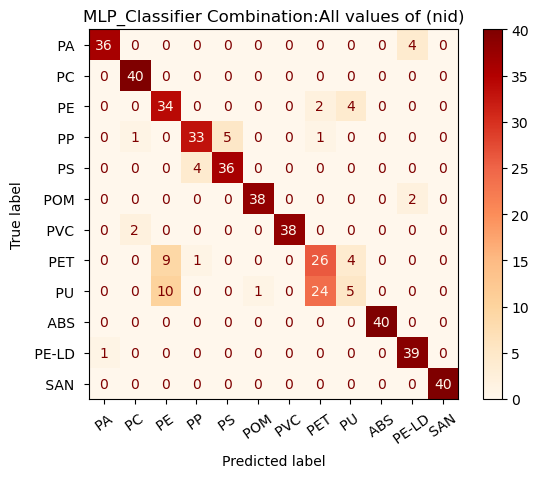

In [58]:

y_pred = mlp.predict(x_test)
print(y_test.shape)
print(y_pred.shape)
# metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
precision=round(precision_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred)),2)
recall=round(recall_score(y_test, y_pred,average='weighted'),2)
accuracy=round(accuracy_score(y_test, y_pred),2)
F1_SCORE=round(f1_score(y_test, y_pred,average='weighted'),2)

cm = confusion_matrix(y_pred, y_test)

ACC1, precision1, recall1, F1_SCORE1 = performance_measurment(cm)
degrees = 35

class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]
plot_confusion_matrix(mlp, x_test, y_test,display_labels=class_names,xticks_rotation=degrees,cmap=plt.cm.OrRd)
plt.title("MLP_Classifier Combination:" + str(name))
print("Combination:" + str(name) +"  Accuracy: " + str(accuracy) +  "\nPrecision: "+ str(precision)+"  Recall: "+ str(recall)  + "  F1-SCORE: "+ str(F1_SCORE))
print("Combination:" + str(name) +"  Accuracy_Matrix: " + str(ACC1) +  "\nPrecision_Matrix: "+ str(precision1) +"\n  Recall_Matrix: "+ str(recall1) + "\n F1-SCORE_Matrix: "+ str(F1_SCORE1))

plt.savefig("phi_mlp_080.png")
#plt.savefig(r'C:\pyyy\auswertung\polymers\MLP_without_early_stopping\\' +name+"_mlp_classifier_without_early_stopping.png")

In [43]:
# hist=get_model(mlp, x_train, x_test)

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
# visualize training results

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'history'